# DATASETS

# Libraries 

In [2]:
import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set the working directory
pwd = "/media/ictd/New Volume/Shapefiles"
os.chdir(pwd)

# SHRUG Mapping (Do it once only)

In [3]:
pc01r = os.path.join(pwd, "shrug-pc-keys-csv\\pc01r_shrid_key.csv")
pc11r = os.path.join(pwd, "shrug-pc-keys-csv\\pc11r_shrid_key.csv")
pc01u = os.path.join(pwd, "shrug-pc-keys-csv\\pc01u_shrid_key.csv")
pc11u = os.path.join(pwd,"shrug-pc-keys-csv\\pc11u_shrid_key.csv")

In [4]:
pc01r = pd.read_csv(pc01r)
pc11r = pd.read_csv(pc11r)
pc01u = pd.read_csv(pc01u)
pc11u = pd.read_csv(pc11u)

In [5]:
# Concatenating the DataFrames
pc01u = pc01u.rename(columns={'pc01_town_id': 'pc01_village_id'})
pc_01 = pd.concat([pc01u, pc01r])

pc11u = pc11u.rename(columns={'pc11_town_id': 'pc11_village_id'})
pc_11 = pd.concat([pc11u, pc11r])

In [6]:
pc_01 = pc_01.set_index('shrid2')
pc_11 = pc_11.set_index('shrid2')

In [7]:
# pc_01 will go into pc_11
final = pc_11.join(pc_01)
final.columns

Index(['pc11_state_id', 'pc11_district_id', 'pc11_subdistrict_id',
       'pc11_village_id', 'pc11_land_area', 'pc11_pca_tot_p', 'pc01_state_id',
       'pc01_district_id', 'pc01_subdistrict_id', 'pc01_village_id',
       'pc01_land_area', 'pc01_pca_tot_p'],
      dtype='object')

In [8]:
columns_to_drop = ['pc11_land_area', 'pc11_pca_tot_p', 'pc01_land_area', 'pc01_pca_tot_p']
final = final.drop(columns=columns_to_drop)

In [9]:
final.head()

,pc11_state_id,pc11_district_id,pc11_subdistrict_id,pc11_village_id,pc01_state_id,pc01_district_id,pc01_subdistrict_id,pc01_village_id
shrid2,,,,,,,,
11-01-001-00001-000002,1,1,1,2,1.0,1.0,1.0,200.0
11-01-001-00001-000005,1,1,1,5,1.0,1.0,1.0,500.0
11-01-001-00001-000006,1,1,1,6,1.0,1.0,1.0,600.0
11-01-001-00001-000007,1,1,1,7,1.0,1.0,1.0,700.0
11-01-001-00001-000008,1,1,1,8,1.0,1.0,1.0,800.0


In [10]:
# Save the final DataFrame as a CSV file
output_path = os.path.join(pwd, "SHRUG.csv")
final.to_csv(output_path)

# Load GEOJSON

In [5]:
GeoJSON = os.path.join(pwd,"Villages2001/With_MetaData/UTERR.geojson")
MH = gpd.read_file(GeoJSON) 

In [18]:
# Print unique values in the 'STATE' column
unique_states = MH['STATE'].unique()
print(unique_states)

[ 4  7 25 26 31 34 35]


In [7]:
# Replace 0 values in 'STATE', 'DISTRICT', and 'SUB_DIST' columns
MH['STATE'] = MH.apply(lambda row: row['SID'] if row['STATE'] == 0 else row['STATE'], axis=1)
MH['DISTRICT'] = MH.apply(lambda row: row['DID'] if row['DISTRICT'] == 0 else row['DISTRICT'], axis=1)
MH['SUB_DIST'] = MH.apply(lambda row: row['TID'] if row['SUB_DIST'] == 0 else row['SUB_DIST'], axis=1)


# Remove all variables from GEOJSON because these are features from census 2001 and we want to add census variables 2011

In [8]:
# List of columns to keep
columns_to_keep = [
    "STATE", "DISTRICT", "SUB_DIST", "TOWN_VILL", "WARD",
    "EB", "LEVEL", "NAME", "NAME_1", "TRU", "geometry"
]

In [9]:
# Select only the specified columns
MH_11 = MH[columns_to_keep]


In [11]:
output_path = os.path.join(pwd, "Villages2001/Without_MetaData/UTERR.geojson")
MH_11.to_file(output_path, driver="GeoJSON")


# Map SHRUG and Shapefiles

In [12]:
mapping = pd.read_csv(os.path.join(pwd, "SHRUG.csv"))

In [13]:
mapping.fillna(0, inplace=True)

In [14]:
mapping[['pc01_state_id', 'pc01_district_id', 'pc01_subdistrict_id', 'pc01_village_id']] = mapping[['pc01_state_id', 'pc01_district_id', 'pc01_subdistrict_id', 'pc01_village_id']].astype(int)

In [15]:
mapping = mapping.set_index('pc01_village_id', drop=False)

In [16]:
mapping.head()

,shrid2,pc11_state_id,pc11_district_id,pc11_subdistrict_id,pc11_village_id,pc01_state_id,pc01_district_id,pc01_subdistrict_id,pc01_village_id
pc01_village_id,,,,,,,,,
200,11-01-001-00001-000002,1,1,1,2,1,1,1,200
500,11-01-001-00001-000005,1,1,1,5,1,1,1,500
600,11-01-001-00001-000006,1,1,1,6,1,1,1,600
700,11-01-001-00001-000007,1,1,1,7,1,1,1,700
800,11-01-001-00001-000008,1,1,1,8,1,1,1,800


In [19]:
# DO MAPPING OF MH.geojson with 27 and dont write it manually i.e create a dictionary
values_to_keep = [4, 7, 25, 26, 31, 34, 35]
mapping = mapping[mapping['pc01_state_id'].isin(values_to_keep)]

#mapping = mapping[mapping['pc01_state_id'] == 27]

In [20]:
# Load Shapefile
shapefile = gpd.read_file(os.path.join(pwd, "Villages2001/Without_MetaData/UTERR.geojson")) 

In [21]:
shapefile = shapefile.set_index('TOWN_VILL', drop=False)

In [22]:
final = shapefile.join(mapping)

In [30]:
final.fillna(0, inplace=True)

In [31]:
final.columns

Index(['STATE', 'DISTRICT', 'SUB_DIST', 'TOWN_VILL', 'WARD', 'EB', 'LEVEL',
       'NAME', 'NAME_1', 'TRU', 'geometry', 'shrid2', 'pc11_state_id',
       'pc11_district_id', 'pc11_subdistrict_id', 'pc11_village_id',
       'pc01_state_id', 'pc01_district_id', 'pc01_subdistrict_id',
       'pc01_village_id'],
      dtype='object')

In [32]:
final.shape

(8, 20)

In [33]:
# Remove rows where 'TOWN_VILL' is 0
#final = final[final['TOWN_VILL'] != 0]

In [34]:
final.head()

,STATE,DISTRICT,SUB_DIST,TOWN_VILL,WARD,EB,LEVEL,NAME,NAME_1,TRU,geometry,shrid2,pc11_state_id,pc11_district_id,pc11_subdistrict_id,pc11_village_id,pc01_state_id,pc01_district_id,pc01_subdistrict_id,pc01_village_id
TOWN_VILL,,,,,,,,,,,,,,,,,,,,
40201000,34,2,0000,40201000,0,0,TOWN,OZHUKARAI MUNICIPALITY,Ozhukarai (M),Urban,"MULTIPOLYGON (((79.83658 12.05771, 79.84090 12...",11-25-495-03948-802638,25.0,495.0,3948.0,802638.0,25.0,2.0,1.0,40201000.0
40201000,34,2,0000,40201000,0,0,TOWN,OZHUKARAI MUNICIPALITY,Ozhukarai (M),Urban,"MULTIPOLYGON (((79.83658 12.05771, 79.84090 12...",11-34-635-05910-804037,34.0,635.0,5910.0,804037.0,34.0,2.0,0.0,40201000.0
40201000,34,2,0000,40201000,0,0,TOWN,OZHUKARAI MUNICIPALITY,Ozhukarai (M),Urban,"MULTIPOLYGON (((79.77734 12.03005, 79.77785 12...",11-25-495-03948-802638,25.0,495.0,3948.0,802638.0,25.0,2.0,1.0,40201000.0
40201000,34,2,0000,40201000,0,0,TOWN,OZHUKARAI MUNICIPALITY,Ozhukarai (M),Urban,"MULTIPOLYGON (((79.77734 12.03005, 79.77785 12...",11-34-635-05910-804037,34.0,635.0,5910.0,804037.0,34.0,2.0,0.0,40201000.0
40201000,34,2,0000,40201000,0,0,TOWN,OZHUKARAI MUNICIPALITY,Ozhukarai (M),Urban,"MULTIPOLYGON (((79.76258 11.93492, 79.76366 11...",11-25-495-03948-802638,25.0,495.0,3948.0,802638.0,25.0,2.0,1.0,40201000.0


In [35]:
# Save Shapefile
output_path = os.path.join(pwd, "Villages2011/Without_MetaData/UTERR.geojson")
final.to_file(output_path, driver="GeoJSON")


ValueError: cannot insert TOWN_VILL, already exists

# Add 2011 MetaData

In [3]:
pop = pd.read_csv(os.path.join(pwd, "Census2011_Data\\Village_level_population_enumeration_2011.csv"))

In [4]:
# Drop the specified columns
columns_to_drop = ["District", "Subdistt", "Ward", "EB", "Level", "Name", "TRU"]
pop = pop.drop(columns=columns_to_drop)


In [5]:
# DO MAPPING OF MH.geojson with 27 and dont write it manually i.e create a dictionary
pop = pop[pop['State'] == 27]

In [6]:
adi = pd.read_csv(os.path.join(pwd, "Census2011_Data\\Village_Level_Predictions_14_States.csv"))

C:\Users\Aatif\AppData\Local\Temp\ipykernel_13436\1620908752.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  adi = pd.read_csv(os.path.join(pwd, "Census2011_Data\\Village_Level_Predictions_14_States.csv"))


In [7]:
columns_to_drop = ['Unnamed: 0', 'Village_2001_ID', 'Village_Name']
adi = adi.drop(columns=columns_to_drop)

In [8]:
adi = adi.set_index('Village_2011_ID')
pop = pop.set_index('Town/Village')

In [9]:
features = pop.join(adi)

In [10]:
features.shape

(51592, 104)

In [11]:
# Save the final DataFrame as a CSV file
output_path = os.path.join(pwd, "Census2011_Metadata.csv")
features.to_csv(output_path)

In [12]:
features.index = features.index.astype(int)

In [14]:
gdf = gpd.read_file(os.path.join(pwd, "Villages2011\\Without_MetaData\\MH.geojson")) 

In [17]:
gdf = gdf.set_index('pc11_village_id', drop=False)

In [18]:
gdf.index = gdf.index.astype(int)

In [33]:
shapefiles_2011 = gdf.join(features)

In [36]:
# Save Shapefile
output_path = os.path.join(pwd, "Villages2011\\With_MetaData\\MH.geojson")
shapefiles_2011.to_file(output_path, driver="GeoJSON")


# Merge to create SubDistrict shapefiles

In [46]:
input_folder = os.path.join(pwd,"Villages2001/Without_MetaData")
output_folder = os.path.join(pwd,"SubDistricts/2001_Without_MetaData")

In [47]:
# Iterate over each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".geojson"):  # Ensure it's a GeoJSON file
        # Read the GeoJSON file
        shapefile = gpd.read_file(os.path.join(input_folder, filename))

        # Select necessary columns
        gdf_temp = shapefile[['STATE', 'DISTRICT', 'SUB_DIST', 'geometry']]
        
        # Filter out rows where SUB_DIST is 0 (assuming 0 is not a valid subdistrict)
        gdf_temp = gdf_temp[gdf_temp['SUB_DIST'] != 0]

        # Dissolve subdistricts within each district
        zones = gdf_temp.dissolve(by=['STATE', 'DISTRICT', 'SUB_DIST'])

        # Save as GeoJSON file
        output_geojson = os.path.join(output_folder, filename)
        zones.to_file(output_geojson, driver='GeoJSON')
        print("done")

done


In [49]:
regions_agg = gpd.read_file(os.path.join(pwd,"SubDistricts\\2001_Without_MetaData\\MH.geojson")) 

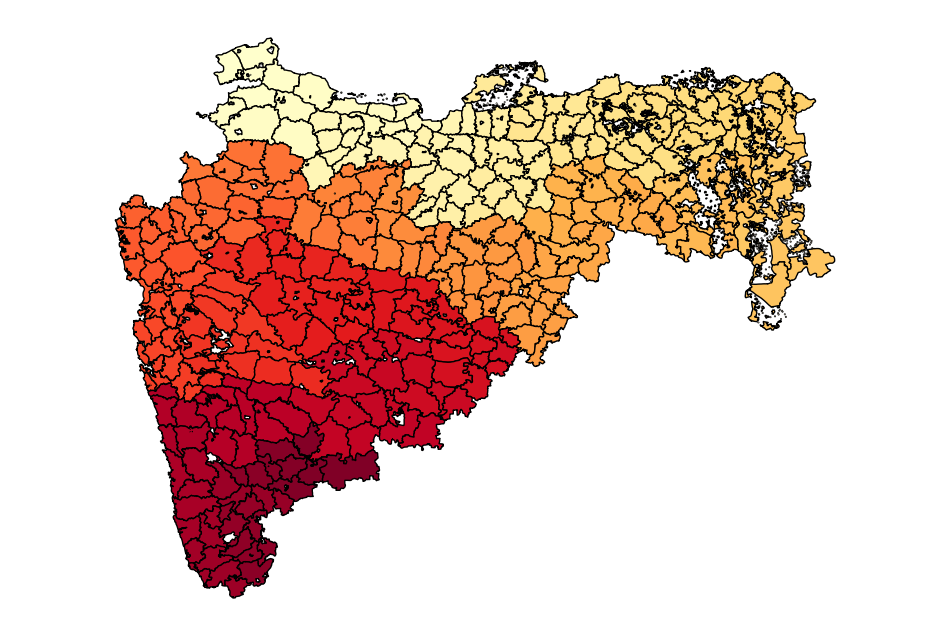

In [50]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new ALAND values
regions_agg.plot(edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax, 
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

# Merge to create District shapefiles

In [51]:
input_folder = os.path.join(pwd,"Villages2001\\Without_MetaData")
output_folder = os.path.join(pwd,"Districts\\2001_Without_MetaData")

In [52]:
# Iterate over each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".geojson"):  # Ensure it's a GeoJSON file
        # Read the GeoJSON file
        shapefile = gpd.read_file(os.path.join(input_folder, filename))

        # Select necessary columns
        gdf_temp = shapefile[['STATE', 'DISTRICT', 'geometry']]
        
        # Filter out rows where SUB_DIST is 0 (assuming 0 is not a valid subdistrict)
        gdf_temp = gdf_temp[gdf_temp['DISTRICT'] != 0]

        # Dissolve subdistricts within each district
        zones = gdf_temp.dissolve(by=['STATE', 'DISTRICT'])

        # Save as GeoJSON file
        output_geojson = os.path.join(output_folder, filename)
        zones.to_file(output_geojson, driver='GeoJSON')
        print("done")

done


In [53]:
regions_agg = gpd.read_file(os.path.join(pwd,"Districts\\2001_Without_MetaData\\MH.geojson")) 

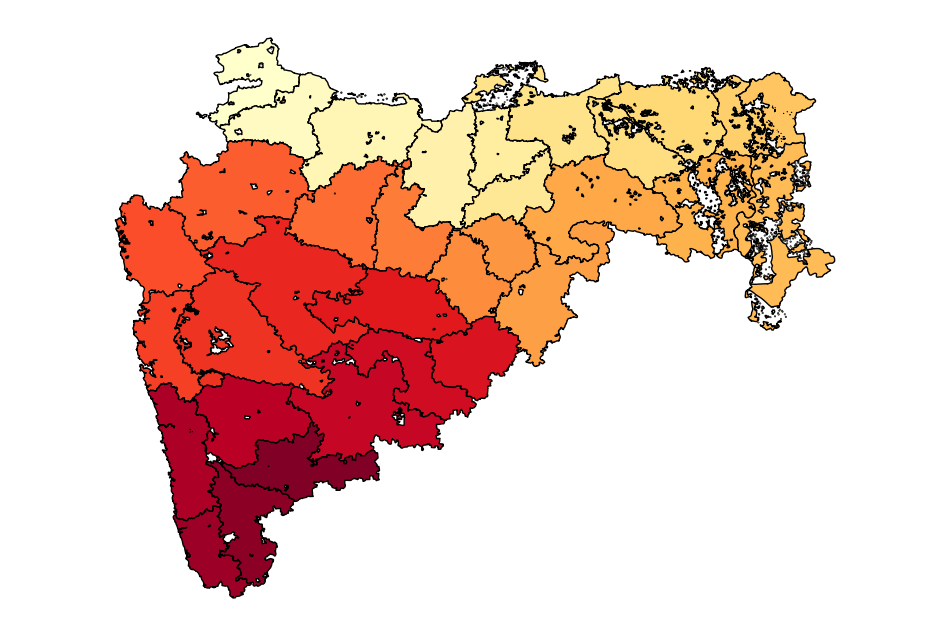

In [54]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new ALAND values
regions_agg.plot(edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax, 
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

# Merge to create State shapefiles

In [59]:
input_folder = os.path.join(pwd,"Villages2001\\Without_MetaData")
output_folder = os.path.join(pwd,"States\\2001_Without_MetaData")

In [60]:
# Iterate over each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".geojson"):  # Ensure it's a GeoJSON file
        # Read the GeoJSON file
        shapefile = gpd.read_file(os.path.join(input_folder, filename))

        # Select necessary columns
        gdf_temp = shapefile[['STATE', 'geometry']]
        
        # Filter out rows where SUB_DIST is 0 (assuming 0 is not a valid subdistrict)
        gdf_temp = gdf_temp[gdf_temp['STATE'] != 0]


        # Save as GeoJSON file
        output_geojson = os.path.join(output_folder, filename)
        zones.to_file(output_geojson, driver='GeoJSON')
        print("done")

done


In [61]:
regions_agg = gpd.read_file(os.path.join(pwd,"States\\2001_Without_MetaData\\MH.geojson")) 

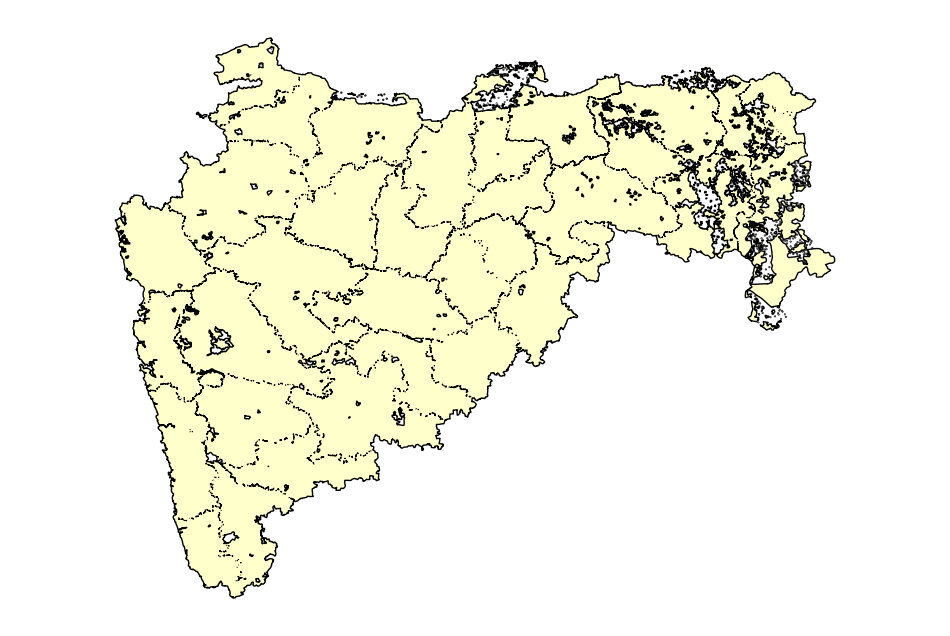

In [62]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new ALAND values
regions_agg.plot(edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax, 
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');